# Lorenz 63 example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from odmd import OnlineDMD, WindowDMD
import time

In [2]:
%run DMD_functions.ipynb
%run fDMD_functions.ipynb
%run Hemati_DMD_functions.ipynb

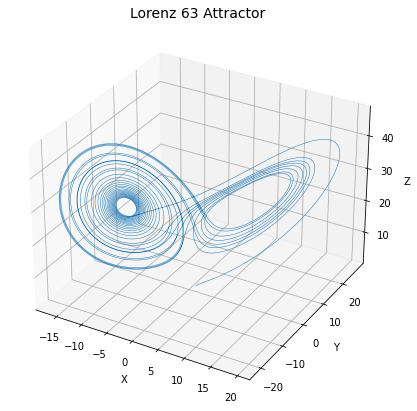

In [3]:
%matplotlib inline
# Lorenz 63 system
def lorenz63(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Initial state
initial_state = [1, 1, 1]

# Time span
t_span = (0, 25)  # From t=0 to t=50
t_eval = np.linspace(*t_span, 100000)  # Time points for evaluation

# Solve the system
solution = solve_ivp(lorenz63, t_span, initial_state, t_eval=t_eval, args=(sigma, rho, beta))

# Extract the solution
x, y, z = solution.y

# Plot the Lorenz attractor
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_title("Lorenz 63 Attractor", fontsize=14)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

x=np.array([x[i] for i in range(0,100000, 10)]).reshape(1,-1)
y=np.array([y[i] for i in range(0,100000, 10)]).reshape(1,-1)
z=np.array([z[i] for i in range(0,100000, 10)]).reshape(1,-1)


In [4]:
"""import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Time-dependent Lorenz 63 system
def lorenz63_time_varying(t, state, sigma_func, rho_func, beta_func):
    x, y, z = state
    sigma = sigma_func(t)  # Time-varying sigma
    rho = rho_func(t)      # Time-varying rho
    beta = beta_func(t)    # Time-varying beta
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Define time-varying parameter functions
def sigma_func(t):
    return 10.0 + 5.0 * np.sin(0.1 * t)  # Oscillates between 5 and 15

def rho_func(t):
    return 28.0 + 10.0 * np.cos(0.05 * t)  # Oscillates between 18 and 38

def beta_func(t):
    return 8.0 / 3.0 + 0.1 * np.sin(0.2 * t)  # Small oscillation around 8/3

# Initial state
initial_state = [1.0, 1.0, 1.0]

# Time span
t_span = (0, 100)  # From t=0 to t=100
t_eval = np.linspace(*t_span, 10000)  # Time points for evaluation

# Solve the system
solution = solve_ivp(lorenz63_time_varying, t_span, initial_state, t_eval=t_eval,
                     args=(sigma_func, rho_func, beta_func))

# Extract the solution
x, y, z = solution.y

# Plot the Lorenz attractor
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_title("Lorenz 63 Attractor with Time-Varying Parameters", fontsize=14)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()
"""

'import numpy as np\nimport matplotlib.pyplot as plt\nfrom scipy.integrate import solve_ivp\n\n# Time-dependent Lorenz 63 system\ndef lorenz63_time_varying(t, state, sigma_func, rho_func, beta_func):\n    x, y, z = state\n    sigma = sigma_func(t)  # Time-varying sigma\n    rho = rho_func(t)      # Time-varying rho\n    beta = beta_func(t)    # Time-varying beta\n    dxdt = sigma * (y - x)\n    dydt = x * (rho - z) - y\n    dzdt = x * y - beta * z\n    return [dxdt, dydt, dzdt]\n\n# Define time-varying parameter functions\ndef sigma_func(t):\n    return 10.0 + 5.0 * np.sin(0.1 * t)  # Oscillates between 5 and 15\n\ndef rho_func(t):\n    return 28.0 + 10.0 * np.cos(0.05 * t)  # Oscillates between 18 and 38\n\ndef beta_func(t):\n    return 8.0 / 3.0 + 0.1 * np.sin(0.2 * t)  # Small oscillation around 8/3\n\n# Initial state\ninitial_state = [1.0, 1.0, 1.0]\n\n# Time span\nt_span = (0, 100)  # From t=0 to t=100\nt_eval = np.linspace(*t_span, 10000)  # Time points for evaluation\n\n# Solve 

# without stacking
- we have more snapshots than the snapshot length - fDMD functions

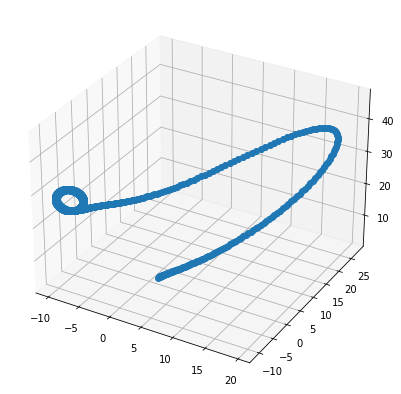

In [5]:
%matplotlib inline
data = np.vstack((x, y, z))


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(data[0,:1000], data[1,:1000], data[2,:1000], 'o')
plt.show()

(n,m) = data.shape

## Samo primijenim DMD na podacima  

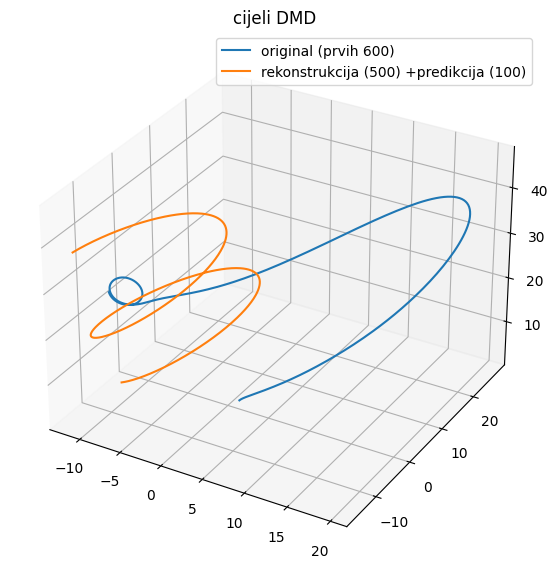

In [6]:
%matplotlib widget
%matplotlib inline

br_snapshotova = 500
Z, L, r, _, _ = fGEDMDQ_multiple_trajectories(data[:,:br_snapshotova], data[:,1:br_snapshotova+1])
t_pred=100
times = [i for i in range (br_snapshotova+t_pred)]
reconstructed_dmd_full = DMD_reconstruction(data[:,:br_snapshotova], Z, 'all', L, times)

fig = plt.figure(figsize=(10, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')

ax.plot(data[0,:br_snapshotova+t_pred], data[1,:br_snapshotova+t_pred], data[2,:br_snapshotova+t_pred], label="original (prvih {})".format(
br_snapshotova+t_pred))
ax.plot(reconstructed_dmd_full[0,:], reconstructed_dmd_full[1,:], reconstructed_dmd_full[2,:], label="rekonstrukcija ({}) +predikcija ({})".format(br_snapshotova,t_pred))
ax.legend()
ax.set_title('cijeli DMD')
fig.savefig('Lorenz63-cijeli_DMD-{}trening-{}predikcija.png'.format(br_snapshotova,t_pred), dpi=fig.dpi, bbox_inches='tight')

## Primjeri kad samo dodajem

In [7]:
#####################################################################################################
##      Kada uzmem 200 snapshotova

q = 10 #toliko uzmem za pocetak
kraj=200

############################################################################################################
##          ZHANG

odmd = OnlineDMD(n, 1.0)
odmd.initialize(data[:, :q], data[:, 1:q+1])
start = time.time()
for k in range(q, kraj-1):
    odmd.update(data[:, k], data[:, k+1])
end = time.time()
print("Online DMD zhang, weighting = 1, time = " + str(end-start) + " secs")

Lambda_z, Z_z = odmd.computemodes()

times = [i for i in range (kraj+10)]

reconstructed_zhang = DMD_reconstruction(data[:,:kraj], Z_z, 'all', Lambda_z, times) #ako pokusam cijeli rekonstruirati - overflow - sv vrijednosti neke su vece od 1 pa je 10000-ti previse rekonstruirati (i puno prije toga)

#######################################################################################################
##      NAS

#isti q, i kraj
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(data[:,:q], data[:,1:q+1])

start = time.time()
for k in range(q, kraj-1):
    Z_nas, Lambda_nas, r, Q, L = fDMD_added_snap(np.hstack((data[:,k], data[:,k+1])).reshape(-1,1), Q, L)
end = time.time()
print("Online DMD nas, weighting = 1, time = " + str(end-start) + " secs")

times = [i for i in range (kraj+10)]

reconstructed_nas = DMD_reconstruction(data[:,:kraj], Z_nas, 'all', Lambda_nas, times)

Online DMD zhang, weighting = 1, time = 0.007086753845214844 secs
Online DMD nas, weighting = 1, time = 0.08768773078918457 secs


In [8]:
#####################################################################################################
##      Kada uzmem 80 snapshotova

q = 10 #toliko uzmem za pocetak
kraj_m=80

############################################################################################################
##          ZHANG

odmd = OnlineDMD(n, 1.0)
odmd.initialize(data[:, :q], data[:, 1:q+1])
start = time.time()
for k in range(q, kraj_m-1):
    odmd.update(data[:, k], data[:, k+1])
end = time.time()
print("Online DMD zhang, weighting = 1, time = " + str(end-start) + " secs")

Lambda_z, Z_z = odmd.computemodes()

times = [i for i in range (kraj_m+10)]

reconstructed_zhang_manji = DMD_reconstruction(data[:,:kraj_m], Z_z, 'all', Lambda_z, times) #ako pokusam cijeli rekonstruirati - overflow - sv vrijednosti neke su vece od 1 pa je 10000-ti previse rekonstruirati (i puno prije toga)

#######################################################################################################
##      NAS

#isti q, i kraj
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(data[:,:q], data[:,1:q+1])

start = time.time()
for k in range(q, kraj_m-1):
    Z_nas, Lambda_nas, r, Q, L = fDMD_added_snap(np.hstack((data[:,k], data[:,k+1])).reshape(-1,1), Q, L)
end = time.time()
print("Online DMD nas, weighting = 1, time = " + str(end-start) + " secs")

times = [i for i in range (kraj_m+10)]

reconstructed_nas_manji = DMD_reconstruction(data[:,:kraj_m], Z_nas, 'all', Lambda_nas, times)

Online DMD zhang, weighting = 1, time = 0.0042803287506103516 secs
Online DMD nas, weighting = 1, time = 0.03130197525024414 secs


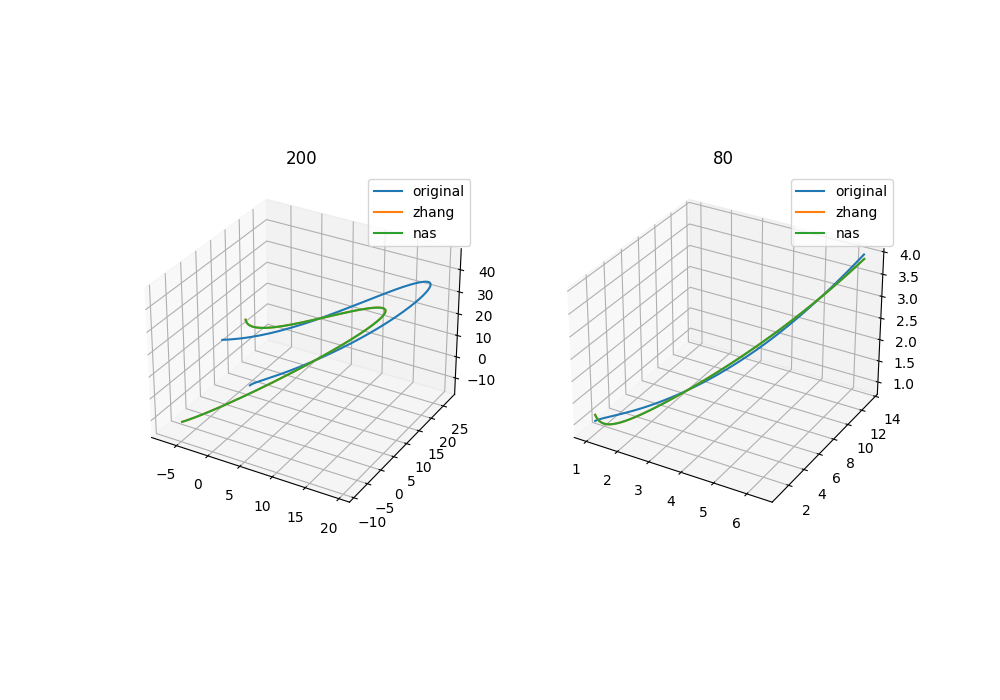

In [9]:
#%matplotlib inline
%matplotlib widget
fig = plt.figure(figsize=(10, 7), dpi=100)
ax = fig.add_subplot(121, projection='3d')

kraj_c = kraj
ax.plot(data[0,:kraj_c], data[1,:kraj_c], data[2,:kraj_c], label="original")
ax.plot(reconstructed_zhang[0,:kraj_c], reconstructed_zhang[1,:kraj_c], reconstructed_zhang[2,:kraj_c], label="zhang")
ax.plot(reconstructed_nas[0,:kraj_c], reconstructed_nas[1,:kraj_c], reconstructed_nas[2,:kraj_c], label="nas")
ax.legend()
ax.set_title('200')


ax2=fig.add_subplot(122, projection='3d')
kraj_c = kraj_m
ax2.plot(data[0,:kraj_c], data[1,:kraj_c], data[2,:kraj_c], label="original")
ax2.plot(reconstructed_zhang_manji[0,:kraj_c], reconstructed_zhang_manji[1,:kraj_c], reconstructed_zhang_manji[2,:kraj_c], label="zhang")
ax2.plot(reconstructed_nas_manji[0,:kraj_c], reconstructed_nas_manji[1,:kraj_c], reconstructed_nas_manji[2,:kraj_c], label="nas")
ax2.legend()
ax2.set_title('80')
plt.show()

... zaključak: treba window verzija, ovo ne funkcionira dobro čim pređemo na duži slučaj

In [10]:
print(Z_z); print("\n",Z_nas) #poklapaju se 

[[ 0.33208815 -0.10301381  0.41518577]
 [-0.53577639 -0.4436666   0.89163102]
 [ 0.77631251  0.89025171  0.18059594]]

 [[ 0.33208815 -0.10301381  0.41518577]
 [-0.53577639 -0.4436666   0.89163102]
 [ 0.77631251  0.89025171  0.18059594]]


# STACKED fDMD
- i dalje samo dodajem

In [11]:
###staviti veliki num_stack i m..

num_stack = 10   
num_stack=30
#num_stack=50
data_stacked = data[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    data_stacked=np.vstack((data_stacked,data[:,i:(m-num_stack+1+i)]))

(n,m)=data_stacked.shape

"""#je li dobro formirano..

print(data_stacked.shape)

k=np.random.randint(num_stack, m-num_stack)
for i in range(num_stack):
    if(np.all(data[:3,k]==data_stacked[3*i:3*i+3,k-i])):
        print(True, end=" ")
    else:
        print(False, data[:2,k],data_stacked[2*i:2*i+2,k-i])"""

'#je li dobro formirano..\n\nprint(data_stacked.shape)\n\nk=np.random.randint(num_stack, m-num_stack)\nfor i in range(num_stack):\n    if(np.all(data[:3,k]==data_stacked[3*i:3*i+3,k-i])):\n        print(True, end=" ")\n    else:\n        print(False, data[:2,k],data_stacked[2*i:2*i+2,k-i])'

Stacked ali samo DMD

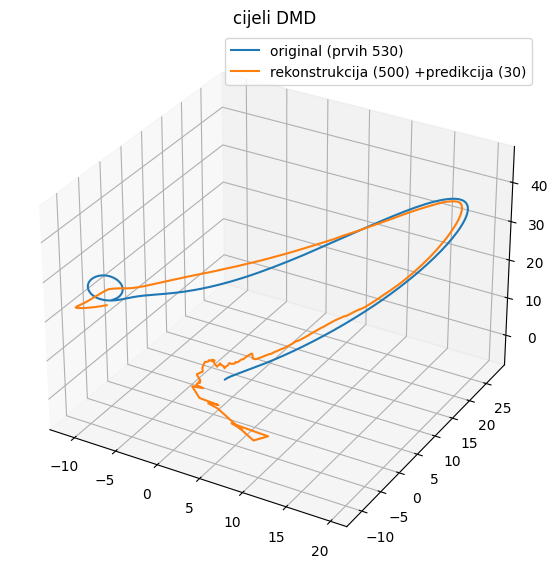

In [12]:
%matplotlib widget
%matplotlib inline

br_snapshotova = 500 #80, 200 ili 500 (s time da je 80 premalo ako stackano 30 puta)
Z, L, r, _, _ = fGEDMDQ_multiple_trajectories(data_stacked[:,:br_snapshotova], data_stacked[:,1:br_snapshotova+1])
t_pred=30
times = [i for i in range (br_snapshotova+t_pred)]
reconstructed_dmd_full = DMD_reconstruction(data_stacked[:,:br_snapshotova], Z, 'all', L, times)

fig = plt.figure(figsize=(10, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')

ax.plot(data_stacked[0,:br_snapshotova+t_pred], data_stacked[1,:br_snapshotova+t_pred], data_stacked[2,:br_snapshotova+t_pred], label="original (prvih {})".format(
br_snapshotova+t_pred))
ax.plot(reconstructed_dmd_full[0,:], reconstructed_dmd_full[1,:], reconstructed_dmd_full[2,:], label="rekonstrukcija ({}) +predikcija ({})".format(br_snapshotova,t_pred))
ax.legend()
ax.set_title('cijeli DMD')
fig.savefig('Lorenz63-STACKED{}-cijeli_DMD-{}trening-{}predikcija.png'.format(num_stack,br_snapshotova,t_pred), dpi=fig.dpi, bbox_inches='tight')

In [13]:
q

10

In [14]:
#####################################################################################################
##      Kada uzmem 200 snapshotova

q = 2*3*num_stack+1 #toliko uzmem za pocetak  - mora biti vece od 2*duzine (2*3*num_stack) da bi funkcioniralo
kraj=200
t_pred=100

############################################################################################################
##          ZHANG

odmd = OnlineDMD(n, 1.0)
odmd.initialize(data_stacked[:, :q], data_stacked[:, 1:q+1])
start = time.time()
for k in range(q, kraj-1):
    odmd.update(data_stacked[:, k], data_stacked[:, k+1])
end = time.time()
print("Online DMD zhang, weighting = 1, time = " + str(end-start) + " secs")

Lambda_z, Z_z = odmd.computemodes()

times = [i for i in range (kraj+t_pred)]

reconstructed_zhang_st = DMD_reconstruction(data_stacked[:,:kraj], Z_z, 'all', Lambda_z, times) #ako pokusam cijeli rekonstruirati - overflow - sv vrijednosti neke su vece od 1 pa je 10000-ti previse rekonstruirati (i puno prije toga)

#######################################################################################################
##      NAS

#isti q, i kraj
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(data_stacked[:,:q], data_stacked[:,1:q+1])

start = time.time()
for k in range(q, kraj-1):
    Z_nas, Lambda_nas, r, Q, L = fDMD_added_snap(np.hstack((data_stacked[:,k], data_stacked[:,k+1])).reshape(-1,1), Q, L)
end = time.time()
print("Online DMD nas, weighting = 1, time = " + str(end-start) + " secs")

reconstructed_nas_st = DMD_reconstruction(data_stacked[:,:kraj], Z_nas, 'all', Lambda_nas, times)

Online DMD zhang, weighting = 1, time = 0.0 secs
Online DMD nas, weighting = 1, time = 0.3518400192260742 secs


In [15]:
reconstructed_zhang_st.shape, reconstructed_nas_st.shape

((90, 300), (90, 300))

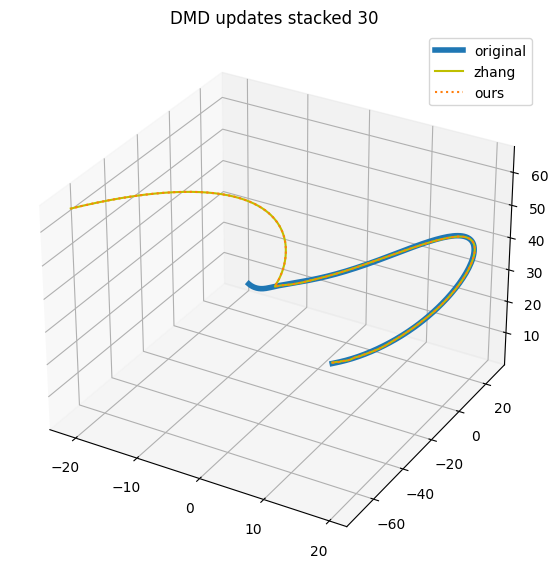

In [16]:
%matplotlib inline
#%matplotlib widget
fig = plt.figure(figsize=(10, 7), dpi=100)
#ax = fig.add_subplot(121, projection='3d') ## za dva plota - usporedba
ax = fig.add_subplot(111, projection='3d')

kraj_c = kraj+t_pred
ax.plot(data_stacked[-3,:kraj_c], data_stacked[-2,:kraj_c], data_stacked[-1,:kraj_c], label="original", linewidth=4)
ax.plot(reconstructed_zhang_st[-3,:kraj_c], reconstructed_zhang_st[-2,:kraj_c], reconstructed_zhang_st[-1,:kraj_c], label="zhang", color="y")
#ax.plot(reconstructed_nas_st[-3,:kraj_c], reconstructed_nas_st[-2,:kraj_c], reconstructed_nas_st[-1,:kraj_c], label="ours")
ax.plot(reconstructed_nas_st[-3,:kraj_c], reconstructed_nas_st[-2,:kraj_c], reconstructed_nas_st[-1,:kraj_c], label="ours", linestyle="dotted")
ax.legend()
ax.set_title('DMD updates stacked {}'.format(num_stack))
fig.savefig('Lorenz63-updates-STACKED{}-reconstruction{}-prediction{}.png'.format(num_stack, kraj, t_pred),dpi=fig.dpi, bbox_inches='tight')

"""ax2=fig.add_subplot(122, projection='3d')
ax2.plot(data[0,:kraj_c], data[1,:kraj_c], data[2,:kraj_c], label="original")
ax2.plot(reconstructed_zhang[0,:kraj_c], reconstructed_zhang[1,:kraj_c], reconstructed_zhang[2,:kraj_c], label="zhang")
ax2.plot(reconstructed_nas[0,:kraj_c], reconstructed_nas[1,:kraj_c], reconstructed_nas[2,:kraj_c], label="nas")
ax2.legend()
ax2.set_title('200 - not stacked')
"""
plt.show()

#sto se dogada na pocetku?? zasto ovako?

##generalno bolji stacked?

In [17]:
data_stacked.shape

(90, 9971)

stacked - zhang updateovi i nasi updateovi daju drugacija rj kada 10 stackano

kada 30 puta stackano vise se poklapaju

kada num_stack = 30, br_snap = 200, t_pred = 100 - njihova greska jako naraste, nasa ostane negdje blizu.. i za 50 vec razlika..

## STACKED - fat matrices

 - window, ali rekonstrukcija samo na kraju + predikcija

In [61]:
def fGEDMD_matrica_A(X, Y, tol=1e-12, type: str=None, k=-1, weights=None): 
    """
    type = "exact" if you want exact version, or None (/leave empty) if you don't want exact version. 
    Anything else set as type will do the non-exact version.
    """
    m=X.shape[1]; N=X.shape[0]
    D = np.linalg.norm(X, axis=0)
    X = X/D; Y=Y/D
    if(weights is not None):
        X = X*weights; Y=Y*weights
    U, Sigma, V = np.linalg.svd(X,full_matrices=False) 
    V=np.conjugate(V.T)
    if(k==-1):
        k=m
        for i in range(1,min(N,m)):
            if(Sigma[i]<=Sigma[0]*tol):
                k=i
                break
    U = U[:, :k]; V=V[:, :k]; Sigma = np.array(Sigma[:k])
    A = Y @ (V/Sigma) @ np.conjugate(U.T)
    return A

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [194]:
import logging
from collections import deque
from typing import Tuple

logger = logging.getLogger(__name__)


class WindowDMD_bez_sherman_morrison:
    """WindowDMD is a class that implements window dynamic mode decomposition
    The time complexity (multiply–add operation for one iteration) is O(8n^2),
    and space complexity is O(2wn+2n^2), where n is the state dimension, w is
    the window size.

    Algorithm description:
        At time step t, define two matrix X(t) = [x(t-w+1),x(t-w+2),...,x(t)],
        Y(t) = [y(t-w+1),y(t-w+2),...,y(t)], that contain the recent w snapshot
        pairs from a finite time window, where x(t), y(t) are the n dimensional
        state vector, y(t) = f(x(t)) is the image of x(t), f() is the dynamics.

        Here, if the (discrete-time) dynamics are given by z(t) = f(z(t-1)),
        then x(t), y(t) should be measurements correponding to consecutive
        states z(t-1) and z(t).

        At time t+1, we need to forget the old snapshot pair xold = x(t-w+1),
        yold = y(t-w+1), and remember the new snapshot pair x = x(t+1),
        y = y(t+1).

        We would like to update the DMD matrix A(t)
        by efficient rank-2 updating window DMD algrithm.
        An exponential weighting factor can be used to place more weight on
        recent data.

    Usage:
        wdmd = WindowDMD(n, w)
        wdmd.initialize(Xw, Yw) # this is necessary for window DMD
        wdmd.update(x, y)
        evals, modes = wdmd.computemodes()

    properties:
        n: state dimension
        w: window size, we must have w >= 2*n
        weighting: weighting factor in (0,1]
        timestep: number of snapshot pairs processed (i.e., current time step)
        Xw: recent w snapshots x stored in Xw, size n by w
        Yw: recent w snapshots y stored in Yw, size n by w
        A: DMD matrix, size n by n
        P: Matrix that contains information about recent w snapshots, size n by n

    methods:
        initialize(Xw, Yw), initialize window DMD algorithm with w snapshot pairs, this is necessary
        update(x, y), update DMD computation by adding a new snapshot pair
        computemodes(), compute and return DMD eigenvalues and DMD modes

    Authors:
        Hao Zhang
        Clarence W. Rowley

    References:
        Zhang, Hao, Clarence W. Rowley, Eric A. Deem, and Louis N. Cattafesta.
        "Online dynamic mode decomposition for time-varying systems."
        SIAM Journal on Applied Dynamical Systems 18, no. 3 (2019): 1586-1609.

    Date created: April 2017
    """

    def __init__(self, n: int, w: int, weighting: float = 0.9) -> None:
        """
        Creat an object for window DMD
        Usage: wdmd = WindowDMD(n, w, weighting), we must have w >= 2*n
        """
        # input check
        assert n >= 1 and isinstance(n, int)
        assert w >= 1 and isinstance(w, int)
        assert w >= 2 * n
        assert weighting > 0 and weighting <= 1

        self.n = n
        self.w = w
        self.weighting = weighting
        self.timestep = 0
        self.Xw = deque()
        self.Yw = deque()
        self.A = np.zeros([n, n])
        self.P = np.zeros([n, n])

        # need to call initialize before update() and computemodes()
        self.ready = False

    def initialize(self, Xw: np.ndarray, Yw: np.ndarray) -> None:
        """Initialize window DMD with first w snapshot pairs stored in (Xw, Yw)
        Usage: wdmd.initialize(Xw, Yw)

        Args:
            Xw (np.ndarray): 2D array, shape (n, w), matrix [x(1),x(2),...x(w)]
            Yw (np.ndarray): 2D array, shape (n, w), matrix [y(1),y(2),...y(w)]
        """
        # input check
        assert Xw is not None and Yw is not None
        Xw, Yw = np.array(Xw), np.array(Yw)
        assert Xw.shape == Yw.shape
        assert Xw.shape == (self.n, self.w)
        assert np.linalg.matrix_rank(Xw) == self.n

        # initialize Xw, Yw queue
        for i in range(self.w):
            self.Xw.append(Xw[:, i])
            self.Yw.append(Yw[:, i])

        # initialize A, P
        # scale Xw Yw
        weight = np.sqrt(self.weighting) ** range(self.w - 1, -1, -1)
        Xwhat, Ywhat = weight * Xw, weight * Yw
        # initialie A and P
        self.A = Ywhat.dot(np.linalg.pinv(Xwhat))
        self.P = np.linalg.inv(Xwhat.dot(Xwhat.T)) / self.weighting
        self.Q = Ywhat.dot(np.transpose(Xwhat))

        # timestep
        self.timestep += self.w

        # mark the model as ready
        self.ready = True

    def update(self, x: np.ndarray, y: np.ndarray) -> None:
        """Update the DMD computation by sliding the finite time window forward
        Forget the oldest pair of snapshots (xold, yold), and remembers the newest
        pair of snapshots (x, y) in the new time window. If the new finite
        time window at time step t+1 includes recent w snapshot pairs as
        X(t+1) = [x(t-w+2),x(t-w+3),...,x(t+1)], Y(t+1) = [y(t-w+2),y(t-w+3),
        ...,y(t+1)], where y(t) = f(x(t)) and f is the dynamics, then we should
        take x = x(t+1), y = y(t+1)
        Usage: wdmd.update(x, y)

        Args:
            x (np.ndarray): 1D array, shape (n, ), x(t) as in y(t) = f(t, x(t))
            y (np.ndarray): 1D array, shape (n, ), x(t) as in y(t) = f(t, x(t))

        Raises:
            Exception: if Not initialized yet! Need to call self.initialize(Xw, Yw)
        """
        if not self.ready:
            raise Exception(
                "Not initialized yet! Need to call self.initialize(Xw, Yw)")

        # input check
        assert x is not None and y is not None
        x, y = np.array(x), np.array(y)

        assert np.array(x).shape == np.array(y).shape
        assert np.array(x).shape[0] == self.n

        # define old snapshots to be discarded
        xold, yold = self.Xw.popleft(), self.Yw.popleft()
        # Update recent w snapshots
        self.Xw.append(x)
        self.Yw.append(y)

        # direct rank-2 update
        # define matrices
        U, V = np.column_stack((xold, x)), np.column_stack((yold, y))
        C = np.diag([-((self.weighting) ** (self.w)), 1])
        # compute PkU matrix matrix product beforehand
        PkU = self.P.dot(U)
        # compute AkU matrix matrix product beforehand
        AkU = self.A.dot(U)
        # compute Gamma
        self.Q = self.Q+V@C@np.transpose(U)

        self.P = np.linalg.inv((np.transpose(self.Xw))@self.Xw)
        self.A = self.P@self.Q
        
        #det = np.linalg.det(C + U.T.dot(PkU))
        #print(det) #dodu ponekad neki brojevi blizu dosta blizu 0
        
        #Gamma = np.linalg.inv(C + U.T.dot(PkU)) 
        # update A
        #self.A += (V - AkU).dot(Gamma).dot(PkU.T)
        # update P
        #self.P = (self.P - PkU.dot(Gamma).dot(PkU.T)) / self.weighting
        
        # ensure P is SPD by taking its symmetric part 
        #self.P = (self.P + self.P.T) / 2  

        # time step + 1
        self.timestep += 1

    def computemodes(self) -> Tuple[np.ndarray, np.ndarray]:
        """Compute and return DMD eigenvalues and DMD modes at current time step
        Usage: evals, modes = wdmd.computemodes()

        Raises:
            Exception: if Not initialized yet! Need to call self.initialize(Xw, Yw)

        Returns:
            Tuple[np.ndarray, np.ndarray]: DMD eigenvalues and DMD modes
        """
        if not self.ready:
            raise Exception(
                "Not initialized yet! Need to call self.initialize(Xw, Yw)")
        evals, modes = np.linalg.eig(self.A)
        return evals, modes

In [195]:
#####################################################################################################
##      VERZIJA S MOJOM MODIFIKACIJOM ZHANG DMD

q = 2*3*num_stack+1 #toliko uzmem za pocetak  - mora biti vece od 2*duzine (2*3*num_stack) da bi funkcioniralo
q=180
kraj=490
t_pred=10

############################################################################################################
##          ZHANG
pravi_a = []
zhang_a = []
razlika= []
poz_def = []
det_p = []
eigvals_p = []

wdmd = WindowDMD_bez_sherman_morrison(n, q, 1) #window size bar 2 puta veci od n = 90 #po defaultu weighting factor 0.9...
wdmd.initialize(data_stacked[:, :q], data_stacked[:, 1:q+1])
start = time.time()
for k in range(q, kraj-1):
    wdmd.update(data_stacked[:, k], data_stacked[:, k+1])
    pravi_a.append(fGEDMD_matrica_A(data_stacked[:,k-q:k], data_stacked[:,k-q+1:k+1]))
    zhang_a.append(wdmd.A)
    razlika.append(np.linalg.norm(pravi_a[k-q]-zhang_a[k-q], ord=2)/np.linalg.norm(pravi_a[k-q], ord=2))
    poz_def.append(is_pos_def(wdmd.P))
    det_p.append(np.linalg.slogdet(wdmd.P))
    eigvals_p.append(np.linalg.eigvals(wdmd.P)[[0,-1]])


end = time.time()
print("Online DMD zhang, weighting = 1, time = " + str(end-start) + " secs")

Lambda_z, Z_z = wdmd.computemodes()

times = [i for i in range (q+t_pred)]

#reconstructed_zhang_st = DMD_reconstruction(data_stacked[:,kraj-q:kraj], Z_z, 'all', Lambda_z, times) #ako pokusam cijeli rekonstruirati - overflow - sv vrijednosti neke su vece od 1 pa je 10000-ti previse rekonstruirati (i puno prije toga)

#######################################################################################################
##      NAS
"""
#isti q, i kraj
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(data_stacked[:,:q], data_stacked[:,1:q+1])

start = time.time()
for k in range(q, kraj-1):
    _, _, _, Q, L = fDMD_added_snap(np.hstack((data_stacked[:,k], data_stacked[:,k+1])).reshape(-1,1), Q, L)
    Z_nas, Lambda_nas, r, Q, L = fDMD_discarding_snap(Q, L)
end = time.time()
print("Online DMD nas, weighting = 1, time = " + str(end-start) + " secs")

reconstructed_nas_st = DMD_reconstruction(data_stacked[:,kraj-q:kraj], Z_nas, 'all', Lambda_nas, times)"""

Online DMD zhang, weighting = 1, time = 16.380228996276855 secs


'\n#isti q, i kraj\nZ_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(data_stacked[:,:q], data_stacked[:,1:q+1])\n\nstart = time.time()\nfor k in range(q, kraj-1):\n    _, _, _, Q, L = fDMD_added_snap(np.hstack((data_stacked[:,k], data_stacked[:,k+1])).reshape(-1,1), Q, L)\n    Z_nas, Lambda_nas, r, Q, L = fDMD_discarding_snap(Q, L)\nend = time.time()\nprint("Online DMD nas, weighting = 1, time = " + str(end-start) + " secs")\n\nreconstructed_nas_st = DMD_reconstruction(data_stacked[:,kraj-q:kraj], Z_nas, \'all\', Lambda_nas, times)'

In [187]:
#####################################################################################################
##      Kada uzmem 200 snapshotova

q = 2*3*num_stack+1 #toliko uzmem za pocetak  - mora biti vece od 2*duzine (2*3*num_stack) da bi funkcioniralo
q=180
kraj=450
t_pred=10

############################################################################################################
##          ZHANG
pravi_a = []
zhang_a = []
razlika= []
poz_def = []
det_p = []
eigvals_p = []

wdmd = WindowDMD(n, q, 1) #window size bar 2 puta veci od n = 90 #po defaultu weighting factor 0.9...
wdmd.initialize(data_stacked[:, :q], data_stacked[:, 1:q+1])
start = time.time()
for k in range(q, kraj-1):
    wdmd.update(data_stacked[:, k], data_stacked[:, k+1])
    pravi_a.append(fGEDMD_matrica_A(data_stacked[:,k-q:k], data_stacked[:,k-q+1:k+1]))
    zhang_a.append(wdmd.A)
    razlika.append(np.linalg.norm(pravi_a[k-q]-zhang_a[k-q], ord=2)/np.linalg.norm(pravi_a[k-q], ord=2))
    poz_def.append(is_pos_def(wdmd.P))
    det_p.append(np.linalg.slogdet(wdmd.P))
    eigvals_p.append(np.linalg.eigvals(wdmd.P)[[0,-1]])


end = time.time()
print("Online DMD zhang, weighting = 1, time = " + str(end-start) + " secs")

Lambda_z, Z_z = wdmd.computemodes()

times = [i for i in range (q+t_pred)]

reconstructed_zhang_st = DMD_reconstruction(data_stacked[:,kraj-q:kraj], Z_z, 'all', Lambda_z, times) #ako pokusam cijeli rekonstruirati - overflow - sv vrijednosti neke su vece od 1 pa je 10000-ti previse rekonstruirati (i puno prije toga)

#######################################################################################################
##      NAS

#isti q, i kraj
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(data_stacked[:,:q], data_stacked[:,1:q+1])

start = time.time()
for k in range(q, kraj-1):
    _, _, _, Q, L = fDMD_added_snap(np.hstack((data_stacked[:,k], data_stacked[:,k+1])).reshape(-1,1), Q, L)
    Z_nas, Lambda_nas, r, Q, L = fDMD_discarding_snap(Q, L)
end = time.time()
print("Online DMD nas, weighting = 1, time = " + str(end-start) + " secs")

reconstructed_nas_st = DMD_reconstruction(data_stacked[:,kraj-q:kraj], Z_nas, 'all', Lambda_nas, times)

Online DMD zhang, weighting = 1, time = 5.757168292999268 secs


c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: LinAlgWarning: Ill-conditioned matrix (rcond=1.88292e-128): result may not be accurate.


Online DMD nas, weighting = 1, time = 32.52036905288696 secs


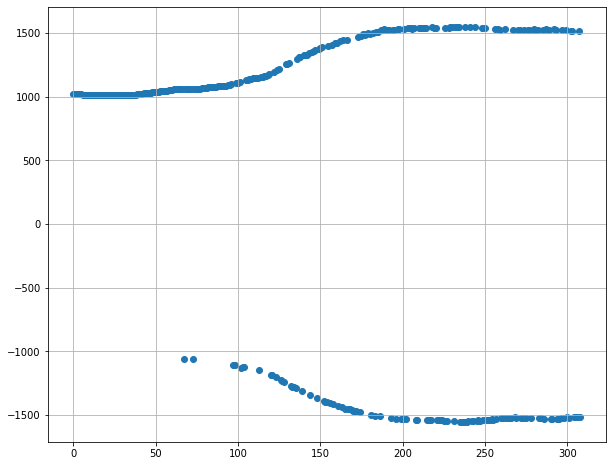

In [196]:
x_os_razlika_A = np.array([[i for i in range(len(razlika))]]).reshape(-1)
det_p = np.array(det_p)
fig = plt.figure(figsize=(10,8))
plt.scatter(x_os_razlika_A, det_p[:,-1]*det_p[:,0])
plt.grid()

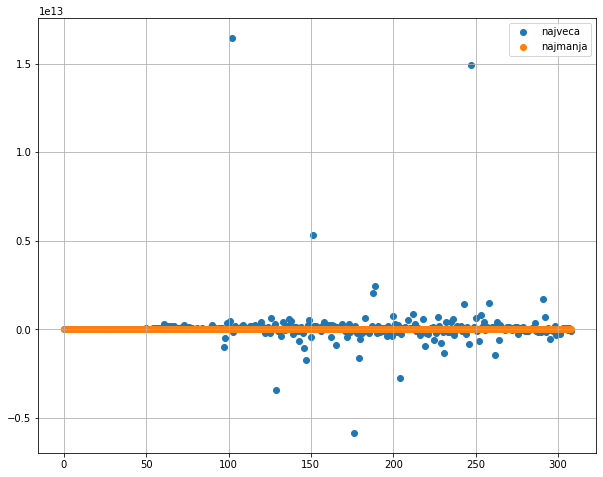

In [197]:
eigvals_p = np.array(eigvals_p)
fig = plt.figure(figsize=(10,8))
plt.scatter(x_os_razlika_A, np.real(eigvals_p[:,0]), label="najveca")
plt.scatter(x_os_razlika_A, np.real(eigvals_p[:,1]), label="najmanja")
plt.grid()
#plt.ylim((-1e10,1e10))
plt.legend()

#samo realni dijelovi, imaginarni jako mali..

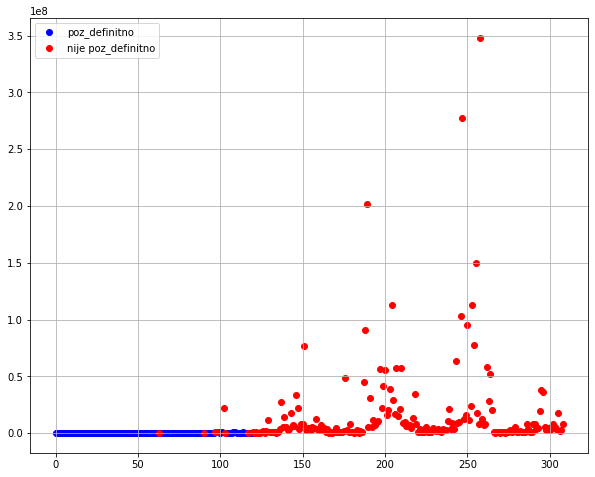

In [200]:
x_os_razlika_A = np.array([[i for i in range(len(razlika))]]).reshape(-1)
poz_def = np.array(poz_def)
razlika = np.array(razlika)

fig = plt.figure(figsize=(10,8))

plt.scatter(x_os_razlika_A[poz_def], razlika[poz_def], color='blue', label='poz_definitno')
plt.scatter(x_os_razlika_A[~poz_def], razlika[~poz_def], color='red', label='nije poz_definitno')
#plt.ylim((0, 100))
plt.grid()
plt.legend()

# Napomena
- ako gore uzmem q=300, kraj=400/500, t_pred=10, dobijem jako veliku sv vrij (Zhang) i ne mogu raditi predikciju..

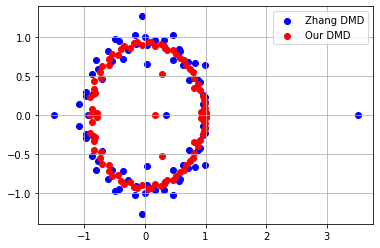

In [44]:
Lambda_z, Lambda_nas

fig=plt.figure()
plt.scatter(np.real(Lambda_z), np.imag(Lambda_z), color='blue', label='Zhang DMD')
plt.scatter(np.real(Lambda_nas), np.imag(Lambda_nas), color="r", label="Our DMD")
plt.grid()
plt.legend()
plt.show()
#fig.savefig('Lorenz63/Lorenz63-EIGVALS-stacked{}-window_size-{}-num_snaps-{}.png'.format(num_stack, q, kraj), dpi=fig.dpi, bbox_inches='tight')

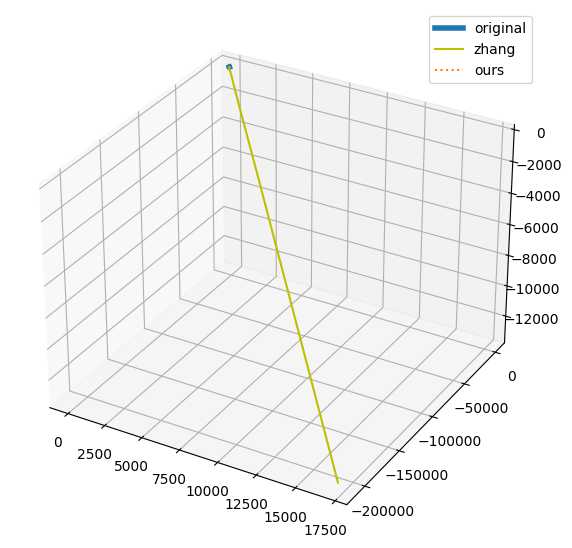

In [42]:
%matplotlib inline
#%matplotlib widget
fig = plt.figure(figsize=(10, 7), dpi=100)
#ax = fig.add_subplot(121, projection='3d') ## za dva plota - usporedba
ax = fig.add_subplot(111, projection='3d')

kraj_c = kraj+t_pred
ax.plot(data_stacked[-3,kraj-q:kraj_c], data_stacked[-2,kraj-q:kraj_c], data_stacked[-1,kraj-q:kraj_c], label="original", linewidth=4)
ax.plot(reconstructed_zhang_st[-3,:kraj_c], reconstructed_zhang_st[-2,:kraj_c], reconstructed_zhang_st[-1,:kraj_c], label="zhang", color="y")
#ax.plot(reconstructed_nas_st[-3,:kraj_c], reconstructed_nas_st[-2,:kraj_c], reconstructed_nas_st[-1,:kraj_c], label="ours")
ax.plot(reconstructed_nas_st[-3,:kraj_c], reconstructed_nas_st[-2,:kraj_c], reconstructed_nas_st[-1,:kraj_c], label="ours", linestyle="dotted")
ax.legend()
#ax.set_title('Window DMD stacked {}'.format(num_stack))
#ax.set_xlim(-100,0), ax.set_ylim(-100,0), ax.set_zlim(0,100)
#fig.savefig('Lorenz63/Lorenz63-stacked{}-window_size-{}-num_snaps-{}-predicted-{}.png'.format(num_stack, q, kraj, t_pred), dpi=fig.dpi, bbox_inches='tight')
#fig.savefig('Lorenz63/zoomed_out-Lorenz63-stacked{}-window_size-{}-num_snaps-{}-predicted-{}.png'.format(num_stack, q, kraj, t_pred), dpi=fig.dpi, bbox_inches='tight')

"""ax2=fig.add_subplot(122, projection='3d')
ax2.plot(data[0,:kraj_c], data[1,:kraj_c], data[2,:kraj_c], label="original")
ax2.plot(reconstructed_zhang[0,:kraj_c], reconstructed_zhang[1,:kraj_c], reconstructed_zhang[2,:kraj_c], label="zhang")
ax2.plot(reconstructed_nas[0,:kraj_c], reconstructed_nas[1,:kraj_c], reconstructed_nas[2,:kraj_c], label="nas")
ax2.legend()
ax2.set_title('200 - not stacked')
"""
plt.show()





dodajem i radim predikciju 10 koraka unaprijed.. i tako nakon svakih 10 dodanih

In [90]:
###staviti veliki num_stack i m..

#num_stack = 10   
num_stack=30
#num_stack=50
data_stacked = data[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    data_stacked=np.vstack((data_stacked,data[:,i:(m-num_stack+1+i)]))

(n,m)=data_stacked.shape
print(n,m)

90 9857


In [108]:
q=250
kraji=kraj=300
t_pred=10

############################################################################################################
##          ZHANG

wdmd = WindowDMD(n, q) #window size bar 2 puta veci od n = 90
wdmd.initialize(data_stacked[:, :q], data_stacked[:, 1:q+1])
Lambda_z, Z_z = wdmd.computemodes()
times=[i for i in range(q+t_pred)]
reconstructed_zhang_st = DMD_reconstruction(data_stacked[:,:q], Z_z, 'all', Lambda_z, times) 
times=[i for i in range(q, q+t_pred)]

start = time.time()
for k in range(q, kraj-1):
    if((k-q)%t_pred==0 and k!=q):
        Lambda_z, Z_z = wdmd.computemodes()
        reconstructed_zhang_st = np.hstack((reconstructed_zhang_st, DMD_reconstruction(data_stacked[:,k-q:k], Z_z, 'all', Lambda_z, times)))
    wdmd.update(data_stacked[:, k], data_stacked[:, k+1])
end = time.time()
print("Online DMD zhang, weighting = 1, time = " + str(end-start) + " secs")

Lambda_z, Z_z = wdmd.computemodes()


#######################################################################################################
##      NAS
#kraj=5000
kraj=500

#isti q, i kraj
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(data_stacked[:,:q], data_stacked[:,1:q+1])
times=[i for i in range(q+t_pred)]
reconstructed_nas_st = DMD_reconstruction(data_stacked[:,:q], Z_nas, 'all', Lambda_nas, times)
times=[i for i in range(q, q+t_pred)]

start = time.time()
for k in range(q, kraj-1):
    _, _, _, Q, L = fDMD_added_snap(np.hstack((data_stacked[:,k], data_stacked[:,k+1])).reshape(-1,1), Q, L)
    Z_nas, Lambda_nas, r, Q, L = fDMD_discarding_snap(Q, L)
    if((k-q)%t_pred==0 and k!=q):
        reconstructed_nas_st = np.hstack((reconstructed_nas_st, DMD_reconstruction(data_stacked[:,k-q:k], Z_nas, 'all', Lambda_nas, times)))
end = time.time()
print("Online DMD nas, weighting = 1, time = " + str(end-start) + " secs")



c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in matmul
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in matmul
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in multiply
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in matmul


ValueError: array must not contain infs or NaNs

zhang ne moze num_stack=50, window bar 300, i onda prevelike sv vrijednosti, eksplodira

ako stavim kraj=1000 - nece se izvrsiti zhang, linalg error dobijem nans ili infs.. i za num_stack=10 i 30

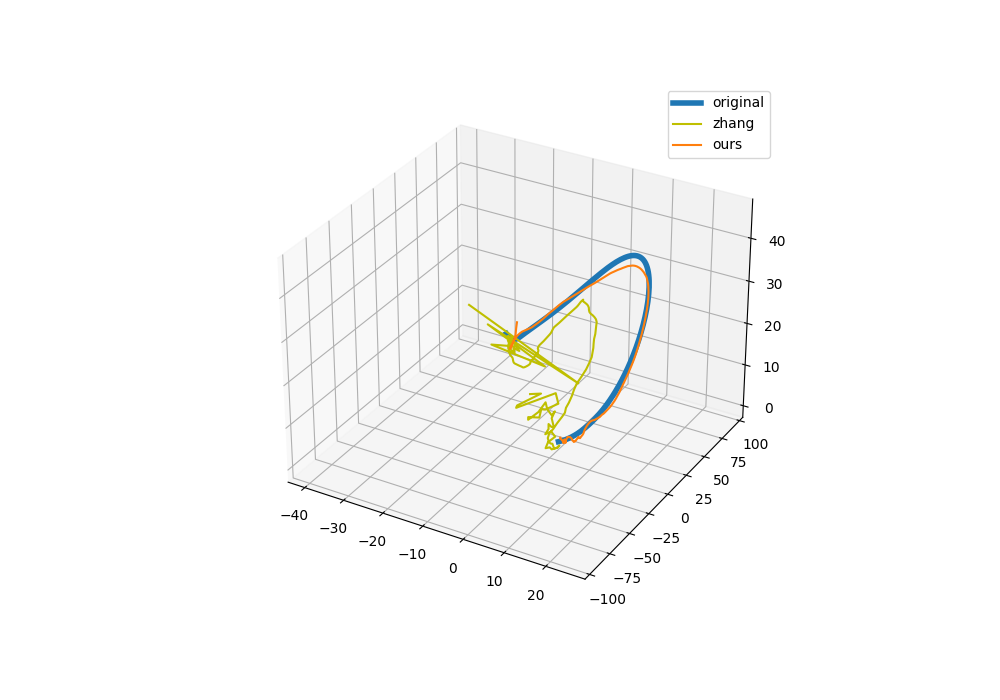

In [107]:
#%matplotlib inline
%matplotlib widget
fig = plt.figure(figsize=(10, 7), dpi=100)
#ax = fig.add_subplot(121, projection='3d') ## za dva plota - usporedba
ax = fig.add_subplot(111, projection='3d')

kraj_c = kraji
ax.plot(data_stacked[-3,:kraj_c], data_stacked[-2,:kraj_c], data_stacked[-1,:kraj_c], label="original", linewidth=4)
ax.plot(reconstructed_zhang_st[-3,:kraj_c], reconstructed_zhang_st[-2,:kraj_c], reconstructed_zhang_st[-1,:kraj_c], label="zhang", color="y")
ax.plot(reconstructed_nas_st[-3,:kraj_c], reconstructed_nas_st[-2,:kraj_c], reconstructed_nas_st[-1,:kraj_c], label="ours")
#ax.plot(reconstructed_nas_st[-3,:kraj_c], reconstructed_nas_st[-2,:kraj_c], reconstructed_nas_st[-1,:kraj_c], label="ours", linestyle="dotted")
ax.legend()

#ax.set_title('Window DMD stacked {}'.format(num_stack))
#ax.set_xlim(-100,0), ax.set_ylim(-100,0), ax.set_zlim(0,100)
#fig.savefig('Lorenz63/Lorenz63-WINDOW-stacked{}-window_size-{}-num_snaps-{}-predicted-{}.png'.format(num_stack, q, kraj, t_pred), dpi=fig.dpi, bbox_inches='tight')


plt.show()

fig.savefig('Lorenz63/Lorenz63-WINDOW-stacked{}-window_size-{}-num_snaps-{}-predicted_every-{}-moment-that-many-moments-ahead.png'.format(num_stack, q, kraj, t_pred), dpi=fig.dpi, bbox_inches='tight')





# more stacked  + window (tall and skinny matrice)

In [14]:
(n,m) = data.shape
num_stack = 70
#num_stack=100
data_stacked = data[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    data_stacked=np.vstack((data_stacked,data[:,i:(m-num_stack+1+i)]))

(n,m)=data_stacked.shape

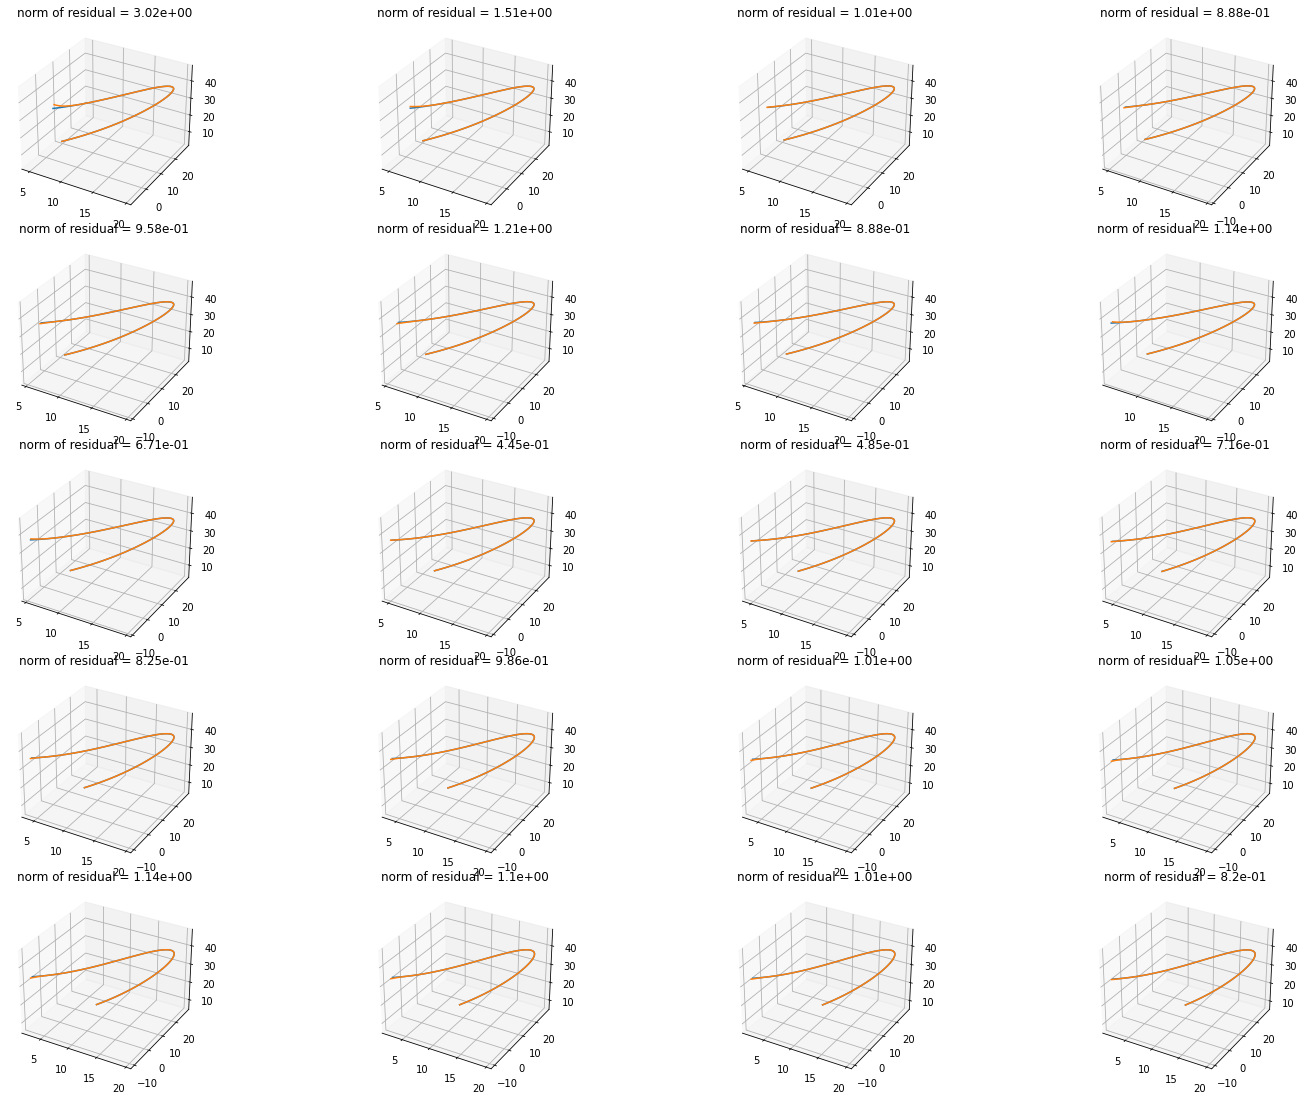

In [27]:
####################################################################################################################################
#       WINDOW DMD
####################################################################################################################################

%matplotlib inline

#dodajem 1
koliko_predvidam=10

poc=0; zav=100


koliko_x=5; koliko_y=4
fig = plt.figure(figsize=(20, 15),constrained_layout=True)

Z, L, r, Q, R = GEDMDQ(data_stacked[:,poc:zav]) #puuuno bolje kada stavim ovaj tol (1e-4) ili tol=1e-6 nego defaultno  
    #           koje su to singularne vrijednosti  za koje dobijem ill conditioned?.. 
    #ne moze se napraviti algoritam koji racuna svd (male sing vrijednosti) henk matrica tocno - postoji teorem

threshold=100000
indices = np.where(r < threshold)[0]
times=[i for i in range(zav-poc+koliko_predvidam)]
predicted=DMD_reconstruction(data_stacked[:,poc:(zav-1)], Z, 'all', L, times)


ax = fig.add_subplot(koliko_x, koliko_y, 1, projection='3d')
ax.plot(data_stacked[-3, poc:zav+koliko_predvidam],data_stacked[-2, poc:zav+koliko_predvidam], data_stacked[-1,poc:zav+koliko_predvidam]) 
ax.plot(predicted[-3,:],predicted[-2,:], predicted[-1,:])
res=np.linalg.norm(predicted[-3:,-koliko_predvidam:]-data_stacked[-3:,zav:zav+koliko_predvidam])
ax.set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))

br=0
for i in range(koliko_x):
    for j in range(koliko_y):
        if(i==0 and j==0):
            continue
        poc=poc+1; zav=zav+1
        _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R)
        
        Z, L, r, Q, R = DMD_added_snap(data_stacked[:,(zav-1):zav], Q, R, ngram=2) 

        indices=np.where(r < threshold)[0]

        predicted = DMD_reconstruction(data_stacked[:,poc:(zav-1)], Z, 'all', L, times)
        ax = fig.add_subplot(koliko_x, koliko_y, 1+j+koliko_y*i, projection='3d')
        ax.plot(data_stacked[-3, poc:zav+koliko_predvidam],data_stacked[-2, poc:zav+koliko_predvidam], data_stacked[-1,poc:zav+koliko_predvidam])
        ax.plot(predicted[-3,:],predicted[-2,:], predicted[-1,:])
        res=np.linalg.norm(predicted[-3:,-koliko_predvidam:]-data_stacked[-3:,zav:zav+koliko_predvidam])
        ax.set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))

#plt.tight_layout()
plt.show()


(11, 99) (11, 99) (11, 11) (11, 11) (11, 11)


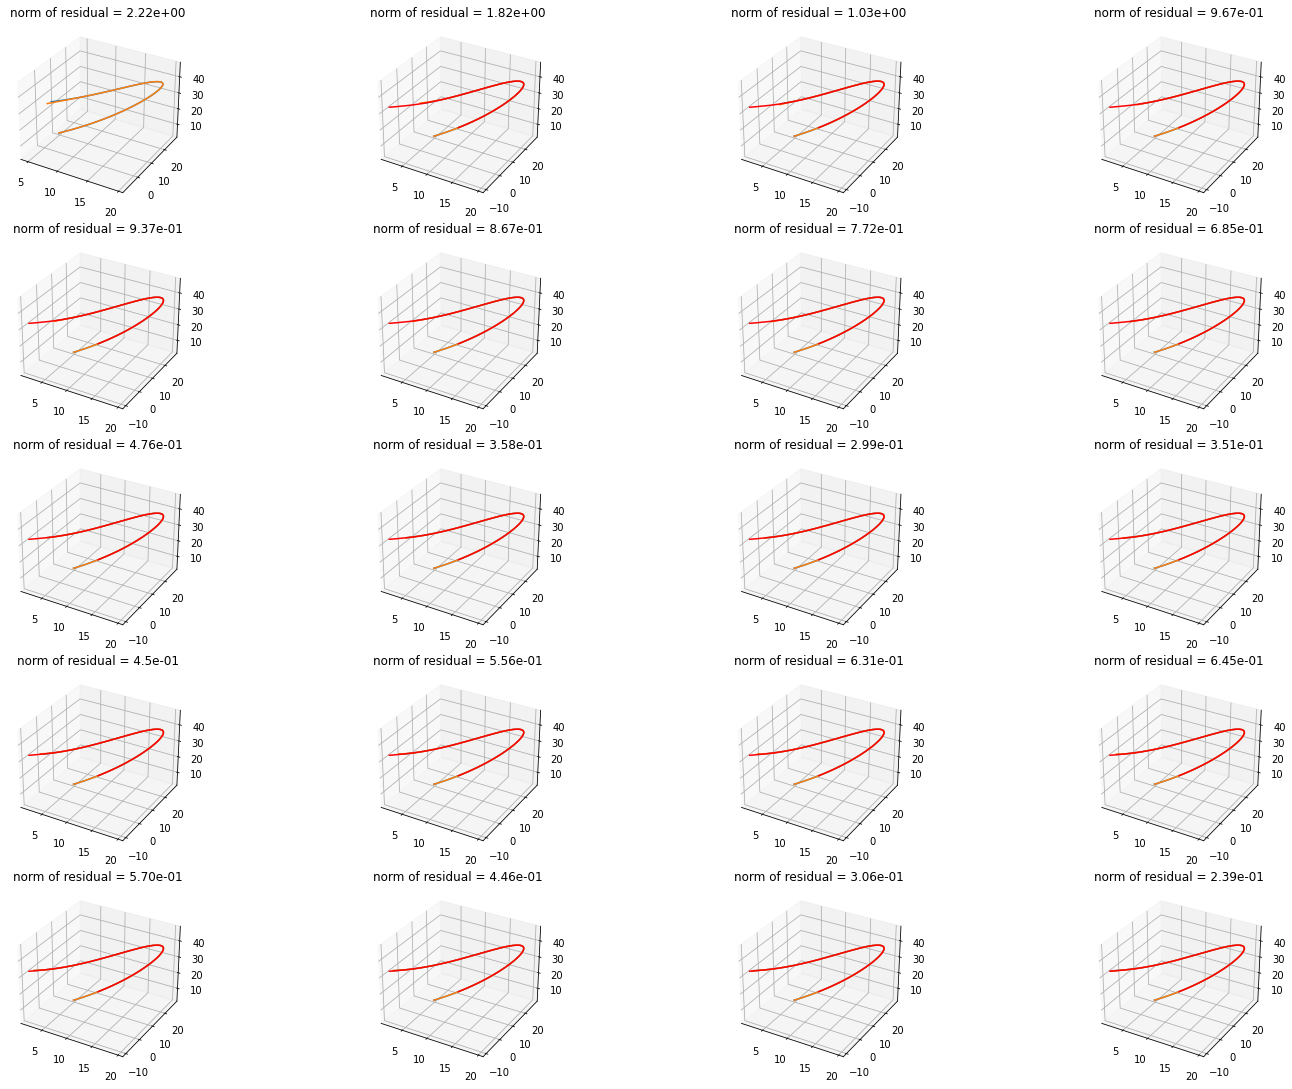

In [ ]:
####################################################################################################################################
#           Usporedba naseg DMD s Hemati DMD
####################################################################################################################################

%matplotlib inline
#dodajem 1
koliko_predvidam=10

poc=0; zav=100


koliko_x=5; koliko_y=4
fig = plt.figure(figsize=(20, 15),constrained_layout=True)

Z, L, r, Q, R = GEDMDQ(data_stacked[:,poc:zav], tol=1e-4)


threshold=1/50
indices = np.where(r < threshold)[0]
times=[i for i in range(zav-poc+koliko_predvidam)]
predicted_hemati=DMD_reconstruction(data_stacked[:,poc:(zav-1)], Z, 'all', L, times)

ax = fig.add_subplot(koliko_x, koliko_y, 1, projection='3d')
ax.plot(data_stacked[-3, poc:zav+koliko_predvidam],data_stacked[-2, poc:zav+koliko_predvidam], data_stacked[-1,poc:zav+koliko_predvidam]) 
ax.plot(predicted_hemati[-3,:],predicted_hemati[-2,:], predicted_hemati[-1,:])
res=np.linalg.norm(predicted_hemati[-3:,-koliko_predvidam:]-data_stacked[-3:,zav:zav+koliko_predvidam])
ax.set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))

tol=1e-12
U_x, Sigma, _ = np.linalg.svd(data_stacked[:,poc:zav-1],full_matrices=False) 
k=m
for i in range(1,m):
    if(Sigma[i]<=Sigma[0]*tol):
        k=i
        break
U_x = U_x[:, :k]

U_y, Sigma, _ = np.linalg.svd(data_stacked[:,poc+1:zav],full_matrices=False) 
k=m
for i in range(1,m):
    if(Sigma[i]<=Sigma[0]*tol):
        k=i
        break
U_y = U_y[:, :k]

X_tilda=U_x.T@data_stacked[:,poc:zav-1]; Y_tilda=U_y.T@data_stacked[:,poc+1:zav]
A = Y_tilda@X_tilda.T; Gx=X_tilda@X_tilda.T; Gy = Y_tilda@Y_tilda.T

print(X_tilda.shape, Y_tilda.shape, A.shape, Gx.shape, Gy.shape)
x=data_stacked[:,zav-1:zav]

br=0
for i in range(koliko_x):
    for j in range(koliko_y):
        if(i==0 and j==0):
            continue
        poc=poc; zav=zav+1
        times=[i for i in range(zav-poc+koliko_predvidam)]
        y=data_stacked[:,zav-1:zav]

        U_x, U_y, A, Gx, Gy = Hemati_update(U_x, U_y, A, Gx, Gy, x, y)
        Z, L = Hemati_compute_modes(U_x, U_y, A, Gx)
        indices=np.where(abs(L)<1e6)[0]

        predicted_hemati = DMD_reconstruction(data_stacked[:,poc:(zav-1)], Z, 'all', L, times)
        
        ax = fig.add_subplot(koliko_x, koliko_y, 1+j+koliko_y*i, projection='3d')
        ax.plot(data_stacked[-3, poc:zav+koliko_predvidam],data_stacked[-2, poc:zav+koliko_predvidam], data_stacked[-1,poc:zav+koliko_predvidam])
        ax.plot(predicted_hemati[-3,:],predicted_hemati[-2,:], predicted_hemati[-1,:]) #narancasto - hemati
        ax.plot(predicted[-3,:],predicted[-2,:], predicted[-1,:],color="r") #crveno-nase
        res=np.linalg.norm(predicted_hemati[-3:,-koliko_predvidam:]-data_stacked[-3:,zav:zav+koliko_predvidam])
        ax.set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))
        x=y
    #ako norma res < 1e-1 npr. odsjeci sve osim zadnjih k
        """if res > 1/50:
            poc=zav-50
            threshold = 1e-2
            """
##isto - treba pogledati sto kada vise u buducnost idemo

primjere koje uspoređivali s drugima - gdje postoji razlika dokumentirati

- napraviti weighted verziju za fDMD, tj. odbacivanje verziju

mezić korda - clanak o konvergenciji edmd-a

simetricni SVD - npr. slika osobe -postoji os oko koje simetricno
- pogledaj moze li se iskoristiti za vorticity mozda..